In [48]:
import cmocean
import matplotlib

import numpy as np
import xarray as xr
import xeofs as xe
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature



datadir = "../data/"
figdir = "../figures/"

In [49]:
def get_region_coords(region_name="arctic_ocean", xy=False):
    if region_name == "arctic_ocean":
        if xy == False:
            region = [-180, 180, 60, 90]
        else:
            region = [110, 230, 40, 255]
    elif region_name == "canada_basin":
        if xy == False:
            region = [-180, -95, 70, 85]
        else:
            region = [70, 130, 135, 205]
    elif region_name == "amerasian_basin":
        if xy == False:
            region = []
        else:
            region = [70, 160, 120, 205]
    elif region_name == "eurasian_basin":
        if xy == False:
            region = [-180, 180, 78, 90]
        else:
            region = [110, 180, 80, 170]
    elif region_name == "makarov_basin":
        if xy == False:
            region = [-180, 180, 78, 90]
        else:
            region = [145, 200, 160, 230]
    elif region_name == "greenland_basin":
        if xy == False:
            region = [-15, 15, 72, 80]
        else:
            region = [110, 145, 50, 85]
    elif region_name == "lofoten_basin":
        if xy == False:
            region = [-5, 13.5, 68, 73]
        else:
            region = [125, 145, 30, 55]
    elif region_name == "norwegian_basin":
        if xy == False:
            region = [-8, 3, 63, 71]
        else:
            region = [115, 135, 15, 45]
    elif region_name == "norwegian_seas":
        if xy == False:
            region = [-15, 15, 62, 73]
        else:
            region = [115, 155, 10, 55]
    elif region_name == "nordic_seas":
        if xy == False:
            region = [-15, 15, 62, 73]
        else:
            region = [75, 175, 0, 90]
    else:
        raise ValueError("undefined region, please check spelling.")
    return region

In [50]:
mdt = "dtu"
hydrography = "woa"

ds = xr.merge([xr.open_dataset(datadir + f"velocities_{mdt}_{hydrography}_ease.nc"),
               xr.open_dataset(datadir + "bathymetry_with_gradients_filter50_ease.nc")
              ]
             )
ds

<xarray.Dataset> Size: 7MB
Dimensions:  (y: 264, x: 264)
Coordinates:
    lat      (y, x) float32 279kB 47.33 47.5 47.67 47.84 ... 47.67 47.5 47.33
    lon      (y, x) float32 279kB -45.0 -44.78 -44.56 ... 135.4 135.2 135.0
  * x        (x) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
  * y        (y) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
Data variables:
    mdt      (y, x) float64 558kB ...
    us       (y, x) float64 558kB ...
    vs       (y, x) float64 558kB ...
    ut       (y, x) float64 558kB ...
    vt       (y, x) float64 558kB ...
    ub       (y, x) float64 558kB ...
    vb       (y, x) float64 558kB ...
    depth    (y, x) float64 558kB ...
    dhdx     (y, x) float64 558kB ...
    dhdy     (y, x) float64 558kB ...
    slope    (y, x) float64 558kB ...
Attributes:
    long_name:     mean ocean dynamic topography
    units:         m
    actual_range:  [-2.205  2.457]

In [51]:
region_name = "canada_basin"
region = get_region_coords(region_name, xy=True)
region

[70, 130, 135, 205]

In [52]:
contour_depth = 2650
contour = xr.open_dataset(datadir + region_name + "/contour_" + str(contour_depth) + ".nc")
contour

<xarray.Dataset> Size: 12kB
Dimensions:   (point: 255)
Coordinates:
  * point     (point) int64 2kB 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254
    x         (point) float64 2kB ...
    y         (point) float64 2kB ...
Data variables:
    tx        (point) float64 2kB ...
    ty        (point) float64 2kB ...
    distance  (point) float64 2kB ...
Attributes:
    description:  Tangent canada_basin contour.
    h_value:      2650
    region_name:  canada_basin
    region:       [ 70 130 135 205]

In [53]:
ds_sel = ds.sel(x=slice(contour.region[0], contour.region[1]),
                y=slice(contour.region[2], contour.region[3])
               )
ds_sel

<xarray.Dataset> Size: 417kB
Dimensions:  (y: 71, x: 61)
Coordinates:
    lat      (y, x) float32 17kB 76.18 76.4 76.63 76.85 ... 73.47 73.48 73.48
    lon      (y, x) float32 17kB -93.26 -93.31 -93.37 ... -177.3 -178.1 -178.8
  * x        (x) int64 488B 70 71 72 73 74 75 76 ... 124 125 126 127 128 129 130
  * y        (y) int64 568B 135 136 137 138 139 140 ... 200 201 202 203 204 205
Data variables:
    mdt      (y, x) float64 35kB ...
    us       (y, x) float64 35kB ...
    vs       (y, x) float64 35kB ...
    ut       (y, x) float64 35kB ...
    vt       (y, x) float64 35kB ...
    ub       (y, x) float64 35kB ...
    vb       (y, x) float64 35kB ...
    depth    (y, x) float64 35kB ...
    dhdx     (y, x) float64 35kB ...
    dhdy     (y, x) float64 35kB ...
    slope    (y, x) float64 35kB ...
Attributes:
    long_name:     mean ocean dynamic topography
    units:         m
    actual_range:  [-2.205  2.457]

In [58]:
ds_interp = ds_sel.interp(x=contour.x, y=contour.y)
ds_interp["uc"] = ds_interp.ub*contour.tx + ds_interp.vb*contour.ty + (-ds_interp.ub*contour.ty + ds_interp.vb*contour.tx)*1j
#ds_interp["vc"] = -ds_interp.ugos_xy*contour.ty + ds_interp.vgos_xy*contour.tx
ds_interp

<xarray.Dataset> Size: 37kB
Dimensions:  (point: 255)
Coordinates:
    lat      (point) float64 2kB 71.93 71.84 71.77 71.71 ... 72.25 72.18 72.06
    lon      (point) float64 2kB -151.4 -150.9 -150.4 ... -152.7 -152.2 -151.8
    x        (point) float64 2kB 93.0 92.21 91.41 90.63 ... 95.33 94.53 93.76
    y        (point) float64 2kB 202.0 202.0 202.0 201.8 ... 201.7 201.6 201.8
  * point    (point) int64 2kB 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254
Data variables:
    mdt      (point) float64 2kB 0.2218 0.2201 0.2187 ... 0.2329 0.2325 0.2275
    us       (point) float64 2kB 0.04391 0.04037 0.0372 ... 0.05354 0.05009
    vs       (point) float64 2kB 0.00538 0.00685 0.006686 ... 0.005312 0.006307
    ut       (point) float64 2kB 0.09137 0.08518 0.0816 ... 0.08104 0.08722
    vt       (point) float64 2kB 0.0168 0.007359 0.004931 ... 0.0412 0.03074
    ub       (point) float64 2kB -0.04746 -0.04482 -0.04439 ... -0.0275 -0.03712
    vb       (point) float64 2kB -0.01142 -0.0005093 ... -0.03589 -0.02443
    depth    (point) float64 2kB 2.647e+03 2.652e+03 ... 2.679e+03 2.65e+03
    dhdx     (point) float64 2kB -0.004234 0.000723 ... -0.002268 -0.004851
    dhdy     (point) float64 2kB -0.03021 -0.02869 ... -0.02658 -0.02757
    slope    (point) float64 2kB 0.0305 0.02881 0.02857 ... 0.02757 0.0268 0.028
    uc       (point) complex128 4kB (0.047453187517847724+0.01143132002853692...
Attributes:
    long_name:     mean ocean dynamic topography
    units:         m
    actual_range:  [-2.205  2.457]

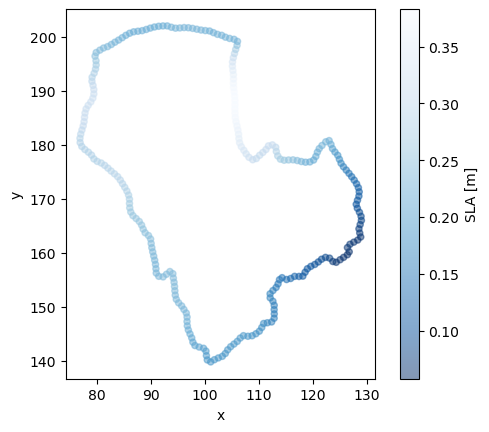

In [55]:
fig, ax = plt.subplots()

s = ax.scatter(ds_interp.x, ds_interp.y, c=ds_interp.mdt, cmap="Blues_r", alpha=0.5, s=20)
fig.colorbar(s, label="SLA [m]")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect("equal")

<xarray.DataArray ()> Size: 8B
array(5.80327575)


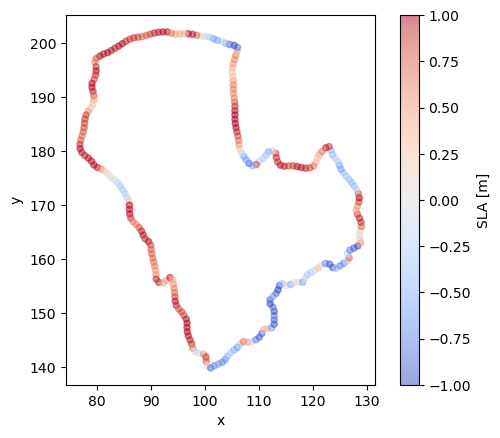

In [59]:
fig, ax = plt.subplots()

s = ax.scatter(ds_interp.x, ds_interp.y,
               c=ds_interp.uc.real/np.sqrt(ds_interp.ub**2 + ds_interp.vb**2),
               vmin=-1,
               vmax=1,
               cmap="coolwarm",
               alpha=0.5,
               s=20
              )
fig.colorbar(s, label="SLA [m]")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect("equal")
print((ds_interp.uc.real/np.sqrt(ds_interp.us**2 + ds_interp.vs**2)).max())

<xarray.DataArray ()> Size: 8B
array(0.08567213)


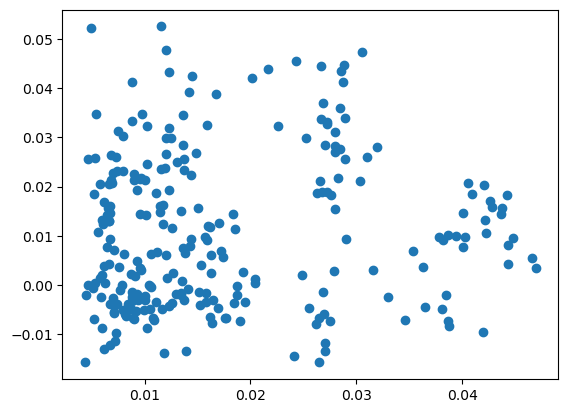

In [60]:
fig, ax = plt.subplots()

corr = xr.corr(ds_interp.slope, ds_interp.uc.real)
print(corr)
ax.scatter(ds_interp.slope, ds_interp.uc.real)

In [93]:
ds_interp2 = ds_interp.interpolate_na(dim="point", method="linear")
ds_interp2

<xarray.Dataset> Size: 33MB
Dimensions:   (time: 1338, point: 255)
Coordinates:
  * time      (time) datetime64[ns] 11kB 2011-01-03 2011-01-06 ... 2021-12-30
    lat       (point) float64 2kB 71.93 71.84 71.77 71.71 ... 72.25 72.18 72.06
    lon       (point) float64 2kB -151.4 -150.9 -150.4 ... -152.7 -152.2 -151.8
    x         (point) float64 2kB 93.0 92.21 91.41 90.63 ... 95.33 94.53 93.76
    y         (point) float64 2kB 202.0 202.0 202.0 201.8 ... 201.7 201.6 201.8
  * point     (point) int64 2kB 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254
Data variables: (12/18)
    sla       (point, time) float64 3MB 0.04471 0.04773 ... 0.1875 0.1751
    adt       (point, time) float64 3MB 0.1498 0.1528 0.1541 ... 0.3015 0.2891
    ugos      (point, time) float64 3MB -0.2378 -0.2259 ... -0.08939 -0.1301
    vgos      (point, time) float64 3MB -0.01729 -0.01772 ... -0.05927 -0.07731
    ugosa     (point, time) float64 3MB -0.1811 -0.1692 ... -0.01895 -0.05966
    vgosa     (point, time) float64 3MB -0.02381 -0.02424 ... -0.05342 -0.07147
    ...        ...
    f         (point) float64 2kB 0.0001386 0.0001385 ... 0.0001388 0.0001387
    ugosa_xy  (point, time) float64 3MB 0.1747 0.1629 ... 0.009895 0.04717
    vgosa_xy  (point, time) float64 3MB 0.05329 0.05173 ... 0.05513 0.07931
    ugos_xy   (point, time) float64 3MB 0.2318 0.22 0.2286 ... 0.07851 0.1158
    vgos_xy   (point, time) float64 3MB 0.05638 0.05482 ... 0.07227 0.09644
    uc        (point, time) complex128 5MB (-0.2317767291023968-0.05642163680...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2011-01-03 00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2011-01-03 00:00:00Z
    title:                           DT merged all satellites Arctic Ocean Gr...

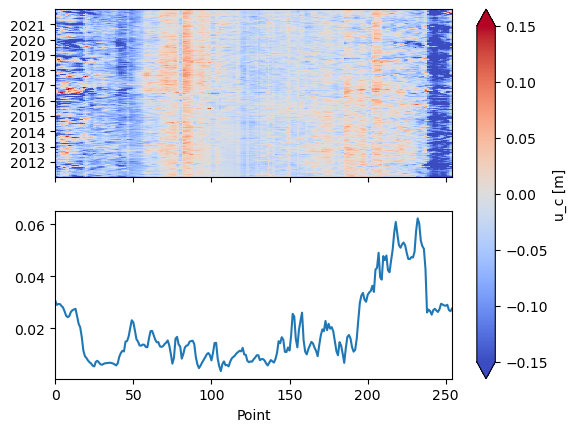

In [94]:
fig, ax = plt.subplots(2, 1, sharex=True)

#mean_adt = ds_test.adt.mean(dim="time")
c = ax[0].pcolormesh(ds_interp2.point, ds_interp2.time,
                  ds_interp2.uc.real.T.isel(time=slice(0, -1), point=slice(0, -1)),
                  cmap="coolwarm",
                  vmin=-1.5e-1,
                  vmax=1.5e-1,
                  shading="flat",
                  rasterized=True
                 )
ax[1].plot(ds_interp2.point, ds_interp2.slope)
ax[1].set_xlabel("Point")
fig.colorbar(c,
             ax=ax,
             label="u_c [m]",
             extend="both"
            )

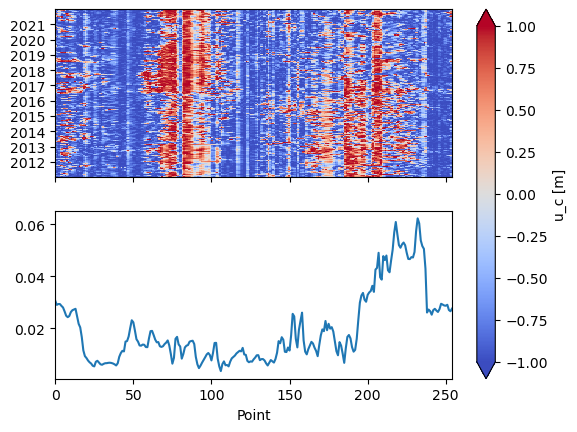

In [95]:
fig, ax = plt.subplots(2, 1, sharex=True)

#mean_adt = ds_test.adt.mean(dim="time")
speed = np.sqrt(ds_interp2.uc.real**2 + ds_interp2.uc.imag**2)
c = ax[0].pcolormesh(ds_interp2.point, ds_interp2.time,
                  (ds_interp2.uc.real/speed).T.isel(time=slice(0, -1), point=slice(0, -1)),
                  cmap="coolwarm",
                  vmin=-1,
                  vmax=1,
                  shading="flat",
                  rasterized=True
                 )
ax[1].plot(ds_interp2.point, ds_interp2.slope)
ax[1].set_xlabel("Point")
fig.colorbar(c,
             ax=ax,
             label="u_c [m]",
             extend="both"
            )

In [96]:
circ = ds_interp2.uc.integrate("point")/contour.distance.sum()*25e3
circ

<xarray.DataArray (time: 1338)> Size: 21kB
array([-0.05499587+0.00132123j, -0.05548981+0.00135734j,
       -0.05431708+0.00159387j, ..., -0.03622842+0.00067376j,
       -0.03472637+0.00088028j, -0.03795605+0.00094112j])
Coordinates:
  * time     (time) datetime64[ns] 11kB 2011-01-03 2011-01-06 ... 2021-12-30

<xarray.DataArray ()> Size: 16B
array(1.14494208-0.18817628j)


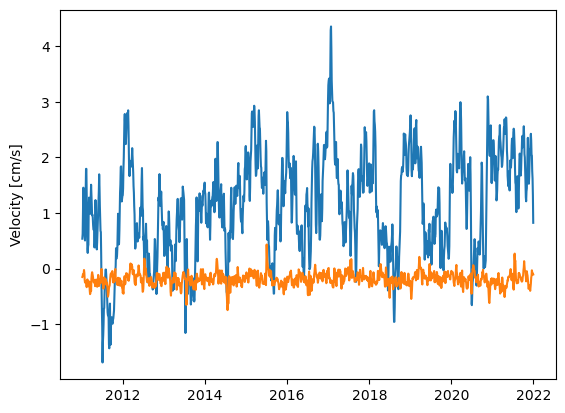

In [81]:
fig, ax = plt.subplots()

ax.plot(circ.time, circ.real*100)
ax.plot(circ.time, circ.imag*100)
ax.set_ylabel("Velocity [cm/s]")
fig.savefig(figdir + region_name + "_circulation.pdf")
print(circ.mean()*100)

<xarray.DataArray ()> Size: 16B
array(-3.6033843+0.10272231j)


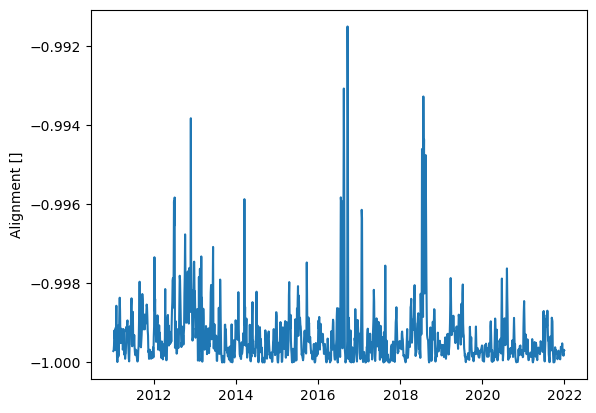

In [97]:
fig, ax = plt.subplots()

ax.plot(circ.time, circ.real/np.sqrt(circ.real**2 + circ.imag**2))
ax.set_ylabel("Alignment []")
#fig.savefig(figdir + region_name + "_circulation.pdf")
print(circ.mean()*100)

<xarray.DataArray ()> Size: 16B
array(-3.6033843+0.10272231j)


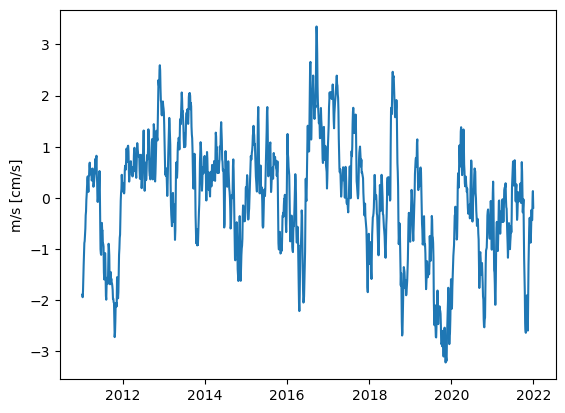

In [18]:
fig, ax = plt.subplots()

circ_mean = circ.mean()*100
ax.plot(circ.time, circ.real*100 - circ_mean.real)
ax.set_ylabel("m/s [cm/s]")
fig.savefig(figdir + region_name + "_circulation_normalized.pdf")
print(circ_mean)

In [79]:
P = 16
dt = 3
S = MTSpec((circ - circ.mean(dim="time")).values,
           nw=P,
           dt=dt,
           iadapt=1,
           nfft=len(circ)
          )
spec = S.spec.ravel()
freq = S.freq.ravel()

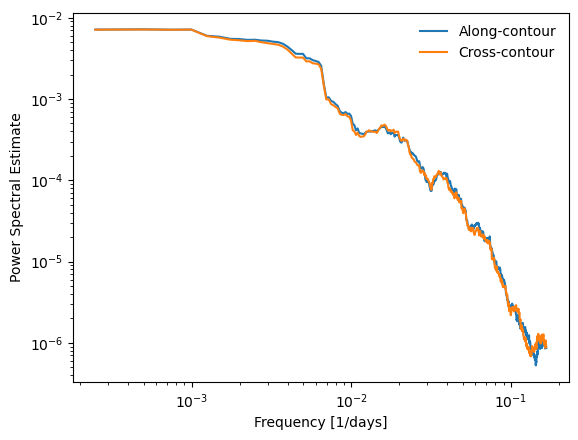

In [80]:
fig, ax = plt.subplots(1, 1)

ax.loglog(freq[freq > 0], spec[freq > 0],
          label="Along-contour"
         )
ax.loglog(-freq[freq < 0], spec[freq < 0],
          label="Cross-contour"
         )
ax.set_xlabel("Frequency [1/days]")
ax.set_ylabel("Power Spectral Estimate")
ax.legend(frameon=False,
          loc="upper right"
         )
fig.savefig(figdir + region_name + "_circulation_spectralestimate.pdf")